# Notebook for labeling data using sentiment analysis model
I utilized a pretrained model, but it is possible to finetune your own model according to your preferences

In [7]:
import flair
classifier = flair.models.TextClassifier.load('sentiment')
from flair.data import Sentence
import datetime
import jsonlines
import time
import csv
import pandas as pd

2020-06-11 14:44:20,395 loading file C:\Users\marce\.flair\models\sentiment-en-mix-distillbert.pt


In [140]:
sentence = Sentence("What is love? Baby don't hurt me, don't hurt me no more")
classifier.predict(sentence)

# check prediction
print(sentence)
if 'POSITIVE' in str(sentence.labels[0]):
    print(float(str(sentence.labels[0]).split('(')[-1][:-1]))
    print(1)
else:
    print(-1)

Sentence: "What is love? Baby don't hurt me, don't hurt me no more"   [− Tokens: 12  − Sentence-Labels: {'class': [POSITIVE (0.999)]}]
0.999
1


In [42]:
def word_search_news(word, location, dates):
    directory = 'C:/Users/marce/Downloads/aylien-covid-news/aylien-covid-news.jsonl'
    dateformat = "%Y-%m-%d"
    location = location.lower()
    enddate = datetime.datetime.strptime('2020-04-05', dateformat)
    dates = [enddate - datetime.timedelta(days = 7*i) for i in range(1,6)]
    texts = [''] * 5
    
    with jsonlines.open(directory) as json_f:
        for i in range(len(json_f.iter())):
            published = datetime.datetime.strptime(line['published_at'][:-6], dateformat + ' %H:%M:%S')
            if len(line['source']['locations']) != 0:

                if line['source']['locations'][0]['state'] is not None:
                    state = line['source']['locations'][0]['state'].lower()
                else:
                    state = None
            
            else:
                country = None
                state = None
            
            if word.lower() in line['body'].lower() and state is not None and location in state:
                flag = True
                for j in range(len(dates)):
                    if published > dates[j]:
                        texts[j] += line['title'] + ". " + line['body'] + ". "
                        flag = False
                        break
            if flag:
                break
                
    for text in texts:
        if text != "":
            text 
    return texts
     
    
def sentiment_analysis(word, location):
    scores = [0] * 5
    texts = word_search_news(word, location)
    for i in range(len(texts)):
        num = 0
        if text[i] == "":
            continue

        for sent in text.split('.'):
            if word in sent.lower():
                sentence = Sentence(sent)
                classifier.predict(sentence)
                print(sent)
                if 'POSITIVE' in str(sentence.labels[0]):
                    score[i] += float(str(sentence.labels[0]).split('(')[-1][:-1])
                else:
                    score[i] -= float(str(sentence.labels[0]).split('(')[-1][:-1])
            
                print(str(sentence.labels[0]))
                num += 1
        
        scores[i] /= num
    
    with open("triplets_training_data.csv", 'a+', newline=''):
        datapoints = [[word, location, dates[i], scores[i]] for i in range(len(scores)) if scores[i] != 0]
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerows(datapoints)    
        

with open('activities_list.txt', 'r') as file:
    for l in file:
        word = l[:-2]
        for city in cities:      
            sentiment_analysis(word, city)

KeyboardInterrupt: 

In [92]:
directory = 'C:/Users/marce/Downloads/aylien-covid-news/aylien-covid-news.jsonl'
state_dict = dict()
city_dict = dict()
error = 0
with jsonlines.open(directory) as json_f:
        for line in json_f.iter():
            if len(line['source']['locations']) != 0:

#                 if line['source']['locations'][0]['country'] is not None:
#                     country = line['source']['locations'][0]['country'].lower()
#                 else:
#                     country = None
                    
                if line['source']['locations'][0]['state'] is not None and line['source']['locations'][0]['state'].lower() not in state_dict:
                    state_dict[line['source']['locations'][0]['state'].lower()] = 1
                elif line['source']['locations'][0]['state'] is not None:
                    state_dict[line['source']['locations'][0]['state'].lower()] += 1
                    
                if line['source']['locations'][0]['city'] is not None and line['source']['locations'][0]['city'].lower() not in city_dict:
                    city_dict[line['source']['locations'][0]['city'].lower()] = 1
                elif line['source']['locations'][0]['city'] is not None:
                    city_dict[line['source']['locations'][0]['city'].lower()] += 1
            else:
                error += 1
            
print(error)

{'description': None, 'domain': 'complex.com', 'home_page_url': 'http://www.complex.com/', 'id': 1737, 'links_in_count': None, 'locations': [{'city': 'New York', 'country': 'US', 'state': 'New York'}], 'logo_url': 'https://images.complex.com/complex/image/upload/c_pad,g_west,h_40,w_125/v1464104389/COMPLEX_2015_RGB.png', 'name': 'Complex', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 4137}, {'country': 'AO', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 6499}, {'country': 'IN', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 10579}, {'country': 'PH', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 2797}, {'country': 'ES', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 14605}, {'country': 'US', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 1177}, {'country': 'IE', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 2584}, {'country': 'AU', 'fetched_at': '2019-06-06 16:06:34+00:00', 'rank': 2148}, {'country': 'NO', 'fetched

{'description': None, 'domain': 'ctvnews.ca', 'home_page_url': 'http://www.ctvnews.ca/#', 'id': 1932, 'links_in_count': None, 'locations': [{'city': None, 'country': 'CA', 'state': None}], 'logo_url': None, 'name': 'CTV News', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 4354}, {'country': 'IN', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 36357}, {'country': 'ES', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 12915}, {'country': 'US', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 5420}, {'country': 'AU', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 9761}, {'country': 'GB', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 11599}, {'country': 'CA', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 84}, {'country': 'JP', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 33767}, {'country': 'CN', 'fetched_at': '2019-06-06 16:08:19+00:00', 'rank': 33629}]}, 'scopes': [{'city': None, 'country': None, 'level': 'internat

{'description': None, 'domain': 'thehindu.com', 'home_page_url': 'http://www.thehindu.com/', 'id': 1528, 'links_in_count': None, 'locations': [{'city': None, 'country': 'IN', 'state': None}], 'logo_url': None, 'name': 'Hindu', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 1057}, {'country': 'IN', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 83}, {'country': 'SG', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 829}, {'country': 'PK', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 1993}, {'country': 'US', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 3861}, {'country': 'SA', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 1027}, {'country': 'AE', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 501}, {'country': 'GB', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 4691}, {'country': 'QA', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 193}, {'country': 'JP', 'fetched_at': '2019-06-06 16:43:55+00:00', 'rank': 14

{'description': None, 'domain': 'dailymail.co.uk', 'home_page_url': 'http://www.dailymail.co.uk/', 'id': 55, 'links_in_count': None, 'locations': [{'city': None, 'country': 'GB', 'state': None}], 'logo_url': 'https://i.dailymail.co.uk/i/furniture/mastHead_1_rss.png', 'name': 'Daily Mail UK', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 209}, {'country': 'IN', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 1060}, {'country': 'SG', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 182}, {'country': 'MY', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 280}, {'country': 'ES', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 512}, {'country': 'US', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 119}, {'country': 'HK', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 320}, {'country': 'RO', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 259}, {'country': 'IE', 'fetched_at': '2019-06-06 16:01:44+00:00', 'rank': 41}, {'country

{'description': None, 'domain': 'indiatimes.com', 'home_page_url': 'http://timesofindia.indiatimes.com/', 'id': 700, 'links_in_count': None, 'locations': [{'city': 'Delhi', 'country': 'IN', 'state': 'Delhi'}], 'logo_url': None, 'name': 'Times of India', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 189}, {'country': 'IN', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 11}, {'country': 'KW', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 53}, {'country': 'BD', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 137}, {'country': 'PK', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 136}, {'country': 'US', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 670}, {'country': 'AU', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 510}, {'country': 'SA', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 218}, {'country': 'AE', 'fetched_at': '2019-06-06 16:39:31+00:00', 'rank': 32}, {'country': 'GB', 'fetched_at': '2019-06-06 16:39:3

{'description': None, 'domain': 'nydailynews.com', 'home_page_url': 'http://www.nydailynews.com/', 'id': 2211, 'links_in_count': None, 'locations': [{'city': 'New York', 'country': 'US', 'state': 'New York'}], 'logo_url': None, 'name': 'NY Daily News', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 3768}, {'country': 'IN', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 29130}, {'country': 'US', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 742}, {'country': 'AU', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 3753}, {'country': 'BR', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 14548}, {'country': 'CA', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 2117}, {'country': 'JP', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 26451}, {'country': 'CN', 'fetched_at': '2019-06-06 16:10:50+00:00', 'rank': 13827}]}, 'scopes': [], 'title': None}
{'description': None, 'domain': 'news.com.au', 'home_page_url': 'http://www.news.c

{'description': None, 'domain': 'globalnews.ca', 'home_page_url': 'http://globalnews.ca/', 'id': 509, 'links_in_count': None, 'locations': [{'city': None, 'country': 'CA', 'state': None}], 'logo_url': None, 'name': 'Global News', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 3237}, {'country': 'IN', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 13845}, {'country': 'US', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 4599}, {'country': 'AU', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 5255}, {'country': 'GB', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 7238}, {'country': 'FR', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 20371}, {'country': 'CA', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 76}, {'country': 'JP', 'fetched_at': '2019-06-06 16:31:44+00:00', 'rank': 17969}, {'country': 'CN', 'fetched_at': '2019-06-06 16:31:45+00:00', 'rank': 15253}, {'country': 'DE', 'fetched_at': '2019-06-06 16:31:45+00:00', 

{'description': None, 'domain': 'google.com', 'home_page_url': 'https://news.google.com/', 'id': 581, 'links_in_count': None, 'locations': [{'city': None, 'country': 'US', 'state': None}], 'logo_url': None, 'name': 'Google News', 'rankings': {'alexa': [{'country': 'PK', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'US', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'HK', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'IR', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'AU', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'SA', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'PL', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'NG', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'SE', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'AR', 'fetched_at': '2019-06-06 16:03:42+00:00', 'rank': 1}, {'country': 'GB',

{'description': None, 'domain': 'denverpost.com', 'home_page_url': 'http://www.denverpost.com/', 'id': 2544, 'links_in_count': None, 'locations': [{'city': 'Denver', 'country': 'US', 'state': 'Colorado'}], 'logo_url': 'https://www.denverpost.com/wp-content/uploads/2016/05/cropped-DP_bug_denverpost.jpg?w=32', 'name': 'The Denver Post', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 2921}, {'country': 'IN', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 45089}, {'country': 'US', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 1630}, {'country': 'AU', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 14972}, {'country': 'GB', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 18338}, {'country': 'CA', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 7258}, {'country': 'JP', 'fetched_at': '2019-06-06 16:14:27+00:00', 'rank': 42620}]}, 'scopes': [], 'title': None}
{'description': None, 'domain': 'marca.com', 'home_page_url': 'http://www

{'description': None, 'domain': 'pbs.org', 'home_page_url': 'http://www.pbs.org/newshour', 'id': 412, 'links_in_count': None, 'locations': [{'city': None, 'country': 'US', 'state': None}], 'logo_url': None, 'name': 'PBS News Hour', 'rankings': {'alexa': [{'country': 'CA', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 1216}, {'country': 'JP', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 6702}, {'country': 'CN', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 16265}, {'country': None, 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 1856}, {'country': 'IN', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 10947}, {'country': 'US', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 391}, {'country': 'AU', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 1481}, {'country': 'GB', 'fetched_at': '2019-06-06 16:31:33+00:00', 'rank': 3525}, {'country': 'DE', 'fetched_at': '2019-06-06 16:31:34+00:00', 'rank': 12111}]}, 'scopes': [{'city': None, 'country': 'US', 'level': 'nati

{'description': None, 'domain': 'nation.co.ke', 'home_page_url': 'http://www.nation.co.ke/', 'id': 1283, 'links_in_count': None, 'locations': [{'city': None, 'country': 'KE', 'state': None}], 'logo_url': None, 'name': 'Nation - Kenya', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 1604}, {'country': 'IN', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 64532}, {'country': 'US', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 14213}, {'country': 'HK', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 3589}, {'country': 'IR', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 16102}, {'country': 'TZ', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 336}, {'country': 'SA', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 3663}, {'country': 'MU', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 108}, {'country': 'NG', 'fetched_at': '2019-06-06 16:42:40+00:00', 'rank': 2461}, {'country': 'UG', 'fetched_at': '2019-06-06 16:42:40+00:

{'description': None, 'domain': 'metro.co.uk', 'home_page_url': 'http://metro.co.uk/', 'id': 556, 'links_in_count': None, 'locations': [{'city': 'London', 'country': 'GB', 'state': 'England'}], 'logo_url': 'https://metro.co.uk/wp-content/uploads/2020/03/cropped-m-icon-black-9693.png?w=32', 'name': 'Metro', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 3006}, {'country': 'IN', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 3015}, {'country': 'SG', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 1376}, {'country': 'MY', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 1361}, {'country': 'PH', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 1890}, {'country': 'ES', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 3308}, {'country': 'PK', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 1956}, {'country': 'US', 'fetched_at': '2019-06-06 16:39:10+00:00', 'rank': 1826}, {'country': 'HK', 'fetched_at': '2019-06-06 16:39:10+00:00', 

{'description': None, 'domain': 'theepochtimes.com', 'home_page_url': 'http://www.theepochtimes.com/', 'id': 2671, 'links_in_count': None, 'locations': [{'city': None, 'country': 'CN', 'state': None}], 'logo_url': None, 'name': 'The Epoch Times', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:15:51+00:00', 'rank': 442}, {'country': 'IN', 'fetched_at': '2019-06-06 16:15:51+00:00', 'rank': 15762}, {'country': 'SG', 'fetched_at': '2019-06-06 16:15:51+00:00', 'rank': 3633}, {'country': 'TW', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 5750}, {'country': 'PH', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 2605}, {'country': 'US', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 2133}, {'country': 'RO', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 7049}, {'country': 'IE', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 2086}, {'country': 'AU', 'fetched_at': '2019-06-06 16:15:52+00:00', 'rank': 1948}, {'country': 'SA', 'fetched_at': '2019-06-06 16

{'description': None, 'domain': 'business-standard.com', 'home_page_url': 'http://www.business-standard.com/', 'id': 327, 'links_in_count': None, 'locations': [{'city': 'Delhi', 'country': 'IN', 'state': 'Delhi'}], 'logo_url': 'https://www.business-standard.com/include/_mod/site/images/logo.png', 'name': 'Business Standard', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 4561}, {'country': 'IN', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 269}, {'country': 'PK', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 2904}, {'country': 'US', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 14261}, {'country': 'SA', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 3593}, {'country': 'AE', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 1530}, {'country': 'QA', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 1766}, {'country': 'JP', 'fetched_at': '2019-06-06 16:38:25+00:00', 'rank': 27672}]}, 'scopes': [{'city': 'Delhi', 'country':

{'description': None, 'domain': 'breitbart.com', 'home_page_url': 'http://www.breitbart.com/', 'id': 353, 'links_in_count': None, 'locations': [{'city': None, 'country': 'US', 'state': None}], 'logo_url': 'https://www.breitbart.com/t/assets/i/breitbart-logo.png', 'name': 'Breitbart', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 305}, {'country': 'US', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 314}, {'country': 'IE', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 768}, {'country': 'AU', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 1110}, {'country': 'CH', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 1384}, {'country': 'SE', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 2003}, {'country': 'GB', 'fetched_at': '2019-06-06 16:03:06+00:00', 'rank': 1722}, {'country': 'FR', 'fetched_at': '2019-06-06 16:03:07+00:00', 'rank': 7820}, {'country': 'BR', 'fetched_at': '2019-06-06 16:03:07+00:00', 'rank': 7902}, {'country':

{'description': None, 'domain': 'go.com', 'home_page_url': 'http://abcnews.go.com/', 'id': 16, 'links_in_count': None, 'locations': [{'city': None, 'country': 'US', 'state': None}], 'logo_url': 'https://s.abcnews.com/images/site/abcnews_google_rss_logo.png', 'name': 'ABC News', 'rankings': {'alexa': [{'country': None, 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 1601}, {'country': 'IN', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 10197}, {'country': 'US', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 353}, {'country': 'AU', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 2157}, {'country': 'GB', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 2547}, {'country': 'FR', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 8414}, {'country': 'CA', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 880}, {'country': 'JP', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 5807}, {'country': 'CN', 'fetched_at': '2019-06-06 16:31:09+00:00', 'rank': 8448}, {'country': 'DE

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
print({k: v for k, v in sorted(city_dict.items(), key=lambda item: item[1], reverse=True)})
print({k: v for k, v in sorted(state_dict.items(), key=lambda item: item[1], reverse=True)})

{'delhi': 26181, 'london': 25240, 'mumbai': 9310, 'new york': 9219, 'toronto': 7602, 'washington, d.c.': 4851, 'san francisco': 4351, 'sydney': 3907, 'hong kong': 3126, 'moscow': 3019, 'los angeles': 3010, 'washington': 2980, 'charlotte': 2918, 'mclean': 2334, 'seoul': 946, 'denver': 911, 'madrid': 704, 'chicago': 485, 'new orleans': 461, 'state college': 375, 'manila': 350, 'lafayette': 204, 'minneapolis': 180, 'nairobi': 140, 'houston': 130, 'huntington beach': 97, 'big rapids': 95, 'cambridge': 83, 'kyiv': 73, 'cape town': 70, 'tel aviv-yafo': 68, 'fort washington': 62, 'charlottesville': 57, 'tehran': 51, 'glendale': 45, 'aurora': 35, 'elgin': 33, 'tinley park': 32, 'needham': 31, 'amsterdam': 31, 'davis': 30, 'atlanta': 30, 'fredericksburg': 30, 'ann arbor': 28, 'harlan': 27, 'bethesda': 25, 'newton': 24, 'tucson': 23, 'ottawa': 22, 'sacramento': 20, 'whanganui': 20, 'evanston': 19, 'boston': 19, 'naperville': 19, 'la cañada flintridge': 17, 'north chicago': 17, 'oxford': 16, 'gai

In [80]:
import requests
url = ('http://newsapi.org/v2/everything?'
       'q=San Francisco AND gym AND Coronavirus&'
       'qInTitle=gym AND Coronavirus&'
       'from=2020-05-31&'
       'to=2020-06-05&'
       'sortBy=popularity&'
       'apiKey=d4d4dd9a93094fa99a2ac33afe992dca')

response = requests.get(url).json()

print(response)

{'status': 'ok', 'totalResults': 3, 'articles': [{'source': {'id': 'usa-today', 'name': 'USA Today'}, 'author': 'USA TODAY, Jessica Flores, USA TODAY', 'title': "Coronavirus updates: Family sues Princess Cruises over relative's death; 24 Hour Fitness on brink of bankruptcy; US deaths near 105K", 'description': 'Princess Cruises is being sued. Health experts fear George Floyd protests will spark more outbreaks. More COVID-19 news Monday.', 'url': 'https://www.usatoday.com/story/news/health/2020/06/01/coronavirus-live-updates-princess-cruises-george-floyd-protest/5302404002/', 'urlToImage': 'https://www.gannett-cdn.com/presto/2020/06/01/USAT/f876c2b6-542d-40ce-a135-0ddb41155e0b-AP20152830600458.jpg?crop=4480,2520,x0,y227&width=3200&height=1680&fit=bounds', 'publishedAt': '2020-06-01T09:59:15Z', 'content': 'Our new series, Rebuilding America, sheds light on the many efforts to resume life and reopen in the aftermath of the deadly coronavirus pandemic\r\nUSA TODAY\r\nAs people continue to 

In [82]:
print(response["articles"][0]['title'])
dir(__builtins__)

Coronavirus updates: Family sues Princess Cruises over relative's death; 24 Hour Fitness on brink of bankruptcy; US deaths near 105K


['ArithmeticError',
 'AssertionError',
 'AttributeError',
 'BaseException',
 'BlockingIOError',
 'BrokenPipeError',
 'BufferError',
 'BytesWarning',
 'ChildProcessError',
 'ConnectionAbortedError',
 'ConnectionError',
 'ConnectionRefusedError',
 'ConnectionResetError',
 'DeprecationWarning',
 'EOFError',
 'Ellipsis',
 'EnvironmentError',
 'Exception',
 'False',
 'FileExistsError',
 'FileNotFoundError',
 'FloatingPointError',
 'FutureWarning',
 'GeneratorExit',
 'IOError',
 'ImportError',
 'ImportWarning',
 'IndentationError',
 'IndexError',
 'InterruptedError',
 'IsADirectoryError',
 'KeyError',
 'KeyboardInterrupt',
 'LookupError',
 'MemoryError',
 'ModuleNotFoundError',
 'NameError',
 'None',
 'NotADirectoryError',
 'NotImplemented',
 'NotImplementedError',
 'OSError',
 'OverflowError',
 'PendingDeprecationWarning',
 'PermissionError',
 'ProcessLookupError',
 'RecursionError',
 'ReferenceError',
 'ResourceWarning',
 'RuntimeError',
 'RuntimeWarning',
 'StopAsyncIteration',
 'StopIter

In [2]:
from __future__ import print_function
import time
import aylien_news_api
from aylien_news_api.rest import ApiException
from pprint import pprint
configuration = aylien_news_api.Configuration()
# Configure API key authorization: app_id
configuration.api_key['X-AYLIEN-NewsAPI-Application-ID'] = '458e14a8'
configuration = aylien_news_api.Configuration()
# Configure API key authorization: app_key
configuration.api_key['X-AYLIEN-NewsAPI-Application-Key'] = 'ad71b145e4a5602a48e097d597b3e513'

configuration.host = "https://api.aylien.com/news"

In [158]:
def get_news_article():
    configuration.host = "https://api.aylien.com/news"
    # Create an instance of the API class
    api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))
    title = 'gym' # str | This parameter is used for finding stories whose title contains a specific keyword. It supports [boolean operators](https://newsapi.aylien.com/docs/boolean-operators).  (optional)
    text = 'Coronavirus'
    body = 'San Francisco'
    language = ['en']
    published_at_start = 'NOW-8DAYS' # str | This parameter is used for finding stories whose published at time is greater than the specified value. [Here](https://newsapi.aylien.com/docs/working-with-dates) you can find more information about how [to work with dates](https://newsapi.aylien.com/docs/working-with-dates).  (optional)
    published_at_end = 'NOW-1DAY'
    categories_taxonomy = 'iptc-subjectcode'
    categories_id = ['03000000', '07000000', '10000000', '11000000', '13000000', '14000000']
    # source_scopes_state = 'California'
    # entities_body_text = ['Chicago']

try:
    # List Stories
    api_response = api_instance.list_stories(title=title, text=text, body=body, language=language, published_at_start=published_at_start, published_at_end=published_at_end, categories_taxonomy=categories_taxonomy, categories_id=categories_id)
    print(api_response._stories[0]._body, api_response._stories[0]._title)
except ApiException as e:
    print("Exception when calling DefaultApi->list_stories: %s\n" % e)

Dining-in restaurants, bars, gyms, museums and indoor religious services can open up in Contra Costa County on July 1, health officials said on Monday. Hair salons and barbershops can reopen June 17, according to the county's updated COVID-19 response plan.

Some indoor leisure activities, like arcades, billiards and bowling alleys, can also return at the start of July, with social distancing restrictions in place. Hotels will once again be available for tourism and individual travel.

Contra Costa Health Service's guidelines for the third phase of reopening amid the coronavirus pandemic are more aggressive than its neighboring Bay Area counties, including Alameda, San Francisco and Santa Clara.

Schools will be allowed to reopen their classrooms in July or August, based on local district plans.

"These openings are a direct response to your patience and observation of the health order," the county said in a statement. "We hope to continue opening up the county, but may need to reconsi

In [6]:
def word_search_news_api(word, location):
    # Create an instance of the API class
    api_instance = aylien_news_api.DefaultApi(aylien_news_api.ApiClient(configuration))
    title = word # str | This parameter is used for finding stories whose title contains a specific keyword. It supports [boolean operators](https://newsapi.aylien.com/docs/boolean-operators).  (optional)
    text = 'Coronavirus'
    body = location
    language = ['en']
    dates = ['NOW-' + str(i*14) + 'DAYS' for i in range(0,4)]
    categories_taxonomy = 'iptc-subjectcode'
    categories_id = ['03000000', '07000000', '10000000', '11000000', '13000000', '14000000']
    texts = [''] * 3  
    for i in range(len(dates) - 1):
        api_response = api_instance.list_stories(title=title, text=text, body=body, language=language, published_at_start=dates[i+1], published_at_end=dates[i], categories_taxonomy=categories_taxonomy, categories_id=categories_id)
        if len(api_response._stories) < 2:
            continue
            
        for j in range(len(api_response._stories)):
            texts[i] += api_response._stories[j]._title + '. '
            texts[i] += api_response._stories[j]._body.replace('\n', '')  + '. '
            
    return texts


def sentiment_analysis(word, location):
    scores = [0] * 3
    dateformat = "%Y-%m-%d"
    enddate = datetime.datetime.strptime('2020-06-10', dateformat)
    dates = [enddate - datetime.timedelta(days = 7*i) for i in range(1,4)]
    texts = word_search_news_api(word, location)

    for i in range(len(texts)):
        num = 0
        if not texts[i]:
            continue
            
        for sent in texts[i].split('.'):
            if word in sent.lower():
                sentence = Sentence(sent)
                classifier.predict(sentence)
                
                if 'POSITIVE' in str(sentence.labels[0]):
                    scores[i] += float(str(sentence.labels[0]).split('(')[-1][:-1])
                else:
                    scores[i] -= float(str(sentence.labels[0]).split('(')[-1][:-1])
            
                num += 1
        
        if num <= 4:
            scores[i] = 0
        else:
            scores[i] /= num
    
    with open("triplets_training_data.csv", 'a+', newline='') as csvfile:
        datapoints = [[word, location, dates[i], scores[i]] for i in range(len(scores)) if scores[i] != 0]
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerows(datapoints)    
        

with open('C:/Users/marce/Documents/Insight_Project/Project/data/raw/list_of_activities.txt', 'r') as file:
    for l in file:
        word = l[:-1].replace('_', ' ')
        with open('C:/Users/marce/Documents/Insight_Project/Project/data/raw/list_of_counties.csv', 'r') as file2:
            for j in file2:
                city = j[:-1]    
                sentiment_analysis(word, city)
                time.sleep(2.5)

KeyboardInterrupt: 

In [23]:
df = pd.read_csv('triplets_training_data.csv', names=['activity', 'county', 'date', 'score'])
df.describe()
# df.boxplot('score', by='date')

,score
count,2876.000000
mean,-0.112755
std,0.374451
min,-0.998536
25%,-0.360665
50%,-0.137860
75%,0.119745
max,0.999200


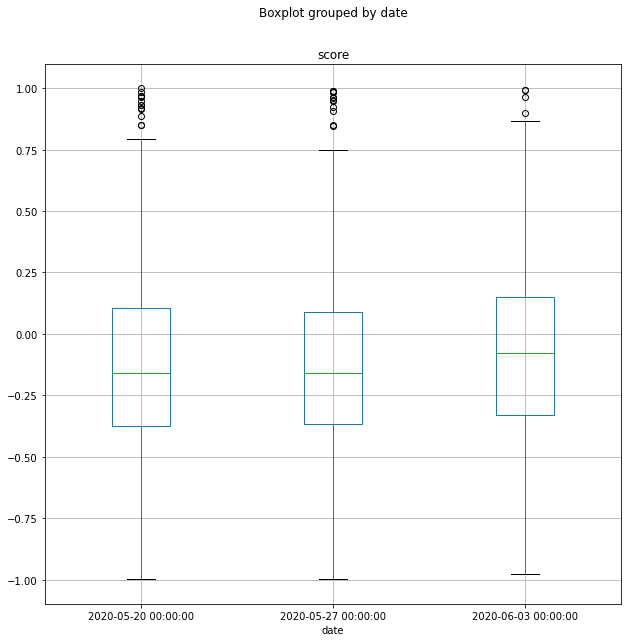

In [27]:
df.boxplot(by='date', column='score', grid=True, figsize=(10,10))

In [65]:
df.groupby('county').std().nlargest(8, 'score')

,score
county,
Cuyahoga,0.619340
Kern,0.504946
Fairfax,0.500814
Fulton,0.481534
Queens,0.446335
Pinellas,0.443649
Brooklyn,0.436976
Tarrant,0.436799


In [63]:
df2 = df.groupby('activity').std()
df3 = df2.nlargest(20, 'score')

,score
activity,
gardening,0.638494
laundry,0.582947
golfing,0.579866
bowling alley,0.568269
mosque,0.519476
concert,0.516146
climbing,0.514920
baseball,0.509368
sailing,0.508459


In [60]:
df.groupby('date').describe()

score                                                    \
                      count      mean       std       min       25%       50%   
date                                                                            
2020-05-20 00:00:00   952.0 -0.125170  0.377920 -0.998536 -0.373489 -0.157613   
2020-05-27 00:00:00  1015.0 -0.125279  0.369242 -0.997567 -0.364976 -0.160109   
2020-06-03 00:00:00   909.0 -0.085770  0.375563 -0.979187 -0.331819 -0.079694   

                                        
                          75%      max  
date                                    
2020-05-20 00:00:00  0.106972  0.99920  
2020-05-27 00:00:00  0.089989  0.98980  
2020-06-03 00:00:00  0.151445  0.99443